In [4]:
pip uninstall tf-nightly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow --upgrade --force-reinstall

  Using cached tensorflow-2.5.0rc3-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached wrapt-1.12.1-cp39-cp39-win_amd64.whl
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
Note: you may need to restart the kernel to use updated packages.Collecting google-pasta~=0.2
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\AdminKDH\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~rapt\\_wrappers.cp39-win_amd64.pyd'
Consider using the `--

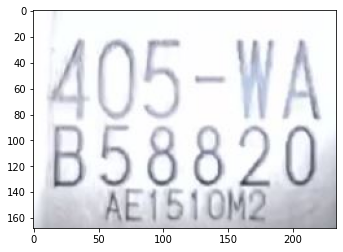

In [15]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# 이미지 로딩
img = load_img('test.JPG')

# 이미지 to Array
data = img_to_array(img)

plt.imshow(img)


In [16]:
data

array([[[254., 254., 252.],
        [254., 254., 252.],
        [254., 254., 254.],
        ...,
        [253., 255., 254.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[254., 254., 252.],
        [254., 254., 252.],
        [254., 254., 254.],
        ...,
        [253., 255., 254.],
        [253., 255., 254.],
        [253., 255., 254.]],

       [[254., 254., 252.],
        [254., 254., 252.],
        [254., 254., 254.],
        ...,
        [253., 255., 254.],
        [253., 255., 254.],
        [253., 255., 254.]],

       ...,

       [[222., 225., 232.],
        [219., 222., 229.],
        [215., 218., 225.],
        ...,
        [156., 159., 166.],
        [151., 154., 161.],
        [151., 154., 161.]],

       [[219., 222., 229.],
        [216., 219., 226.],
        [212., 215., 222.],
        ...,
        [153., 156., 163.],
        [148., 151., 158.],
        [147., 150., 157.]],

       [[217., 220., 227.],
        [214., 217., 224.],
        [210., 2

In [18]:
data.shape

(168, 234, 3)

In [9]:
# 2.Horizontal and Vertical shift Augmentation
# 이미지를 위, 아래로 움직이기

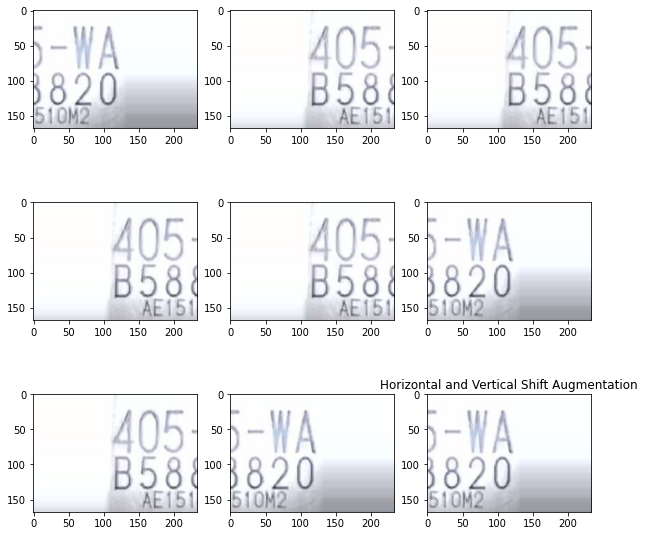

In [19]:
# 2-1.width_shift_range : 왼쪽, 오른쪽 움직이기

# 첫 번째, 차원 추가하여 확장
samples = expand_dims(data, 0)

# Generator 생성
# range를 설정해 얼마나 움직일지 정함
datagen = ImageDataGenerator(width_shift_range=[-100,100])

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# figure 생성
fig = plt.figure(figsize = (10, 10))

# 9개 이미지 생성
for i in range(9):
    plt.subplot(3, 3, i+1)

    # generate batch of images
    batch = it.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.title("Horizontal and Vertical Shift Augmentation")
plt.show()


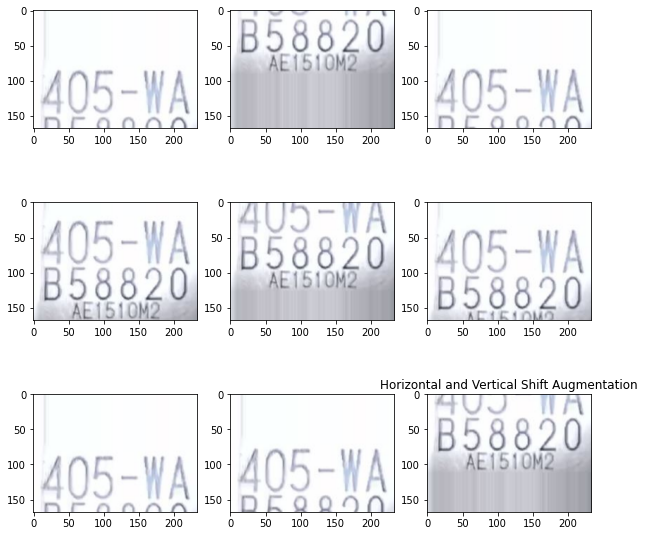

In [20]:
# 2-2.height_shift_range : 위, 아래로 움직이는 것
# height_shift_range = 0.5와 같이 비율로 설정 가능

# 첫 번째, 차원 추가하여 확장
samples = expand_dims(data, 0)

# Generator 생성 (Create image data augmentation generator)
# range를 설정해 얼마나 움직일지 정함
datagen = ImageDataGenerator(height_shift_range=0.5)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# figure 생성
fig = plt.figure(figsize = (10, 10))

# 9개 이미지 생성
for i in range(9):

    # define subplot
    plt.subplot(3, 3, i+1)

    # generate batch of images
    batch = it.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.title("Horizontal and Vertical Shift Augmentation")
plt.show()

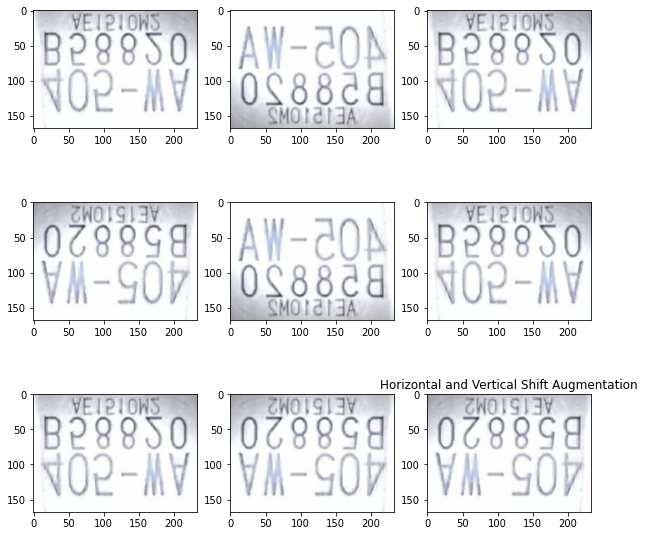

In [21]:
# 3. Horizontal and Vertical Flip Augmentation
# 위, 아래, 왼쪽, 오른쪽으로 뒤집기

# 첫 번째, 차원 추가하여 확장
samples = expand_dims(data, 0)

# Generator 생성 (Create image data augmentation generator)
# flip 하기
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# figure 생성
fig = plt.figure(figsize = (10, 10))

# 9개 이미지 생성
for i in range(9):

    # define subplot
    # plt.subplot(3, 3, i+1)
    plt.subplot(330+1+i)

    # generate batch of images
    batch = it.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.title("Horizontal and Vertical Shift Augmentation")
plt.show()

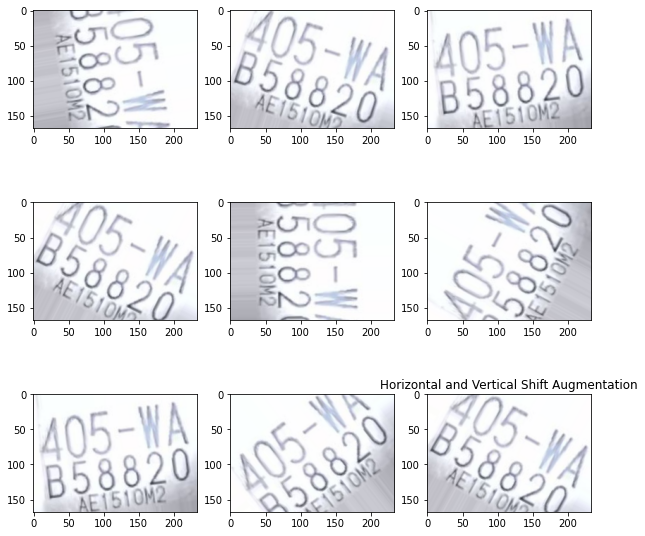

In [22]:
# 4.Random Rotation Augmentation : 이미지를 랜덤한 각도로 돌리기


# 첫 번째, 차원 추가하여 확장
samples = expand_dims(data, 0)

# Generator 생성 (Create image data augmentation generator)
# flip 하기
datagen = ImageDataGenerator(rotation_range=90)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# figure 생성
fig = plt.figure(figsize = (10, 10))

# 9개 이미지 생성
for i in range(9):

    # define subplot
    # plt.subplot(3, 3, i+1)
    plt.subplot(330+1+i)

    # generate batch of images
    batch = it.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.title("Horizontal and Vertical Shift Augmentation")
plt.show()

In [ ]:
# 4.Random Rotation Augmentation : 이미지를 랜덤한 각도로 돌리기 2


# 첫 번째, 차원 추가하여 확장
samples = expand_dims(data, 0)

# Generator 생성 (Create image data augmentation generator)
# flip 하기
datagen = ImageDataGenerator(rotation_range=360)

# prepare iterator
it = datagen.flow(samples, batch_size=1)

# figure 생성
fig = plt.figure(figsize = (10, 10))

# 9개 이미지 생성
for i in range(50):

    # define subplot
    # plt.subplot(3, 3, i+1)
    plt.subplot(330+1+i)

    # generate batch of images
    batch = it.next()

    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')

    # plot raw pixel data
    plt.imshow(image)

# show the figure
plt.title("Horizontal and Vertical Shift Augmentation")
plt.show()